In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = 6 * np.random.rand(100, 1) - 3

y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)


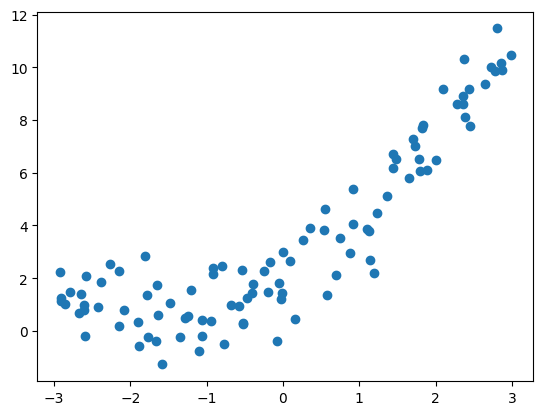

In [3]:
plt.scatter(X, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [6]:
regression.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression.predict(X_test))
print(score)

0.6987916854224474


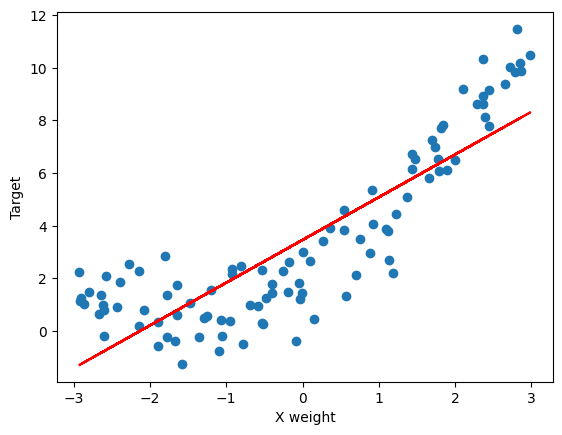

In [8]:
plt.scatter(X, y)
plt.plot(X_train, regression.predict(X_train), color='r')
plt.xlabel('X weight')
plt.ylabel('Target')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True
                          )

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [11]:
X_train_poly

array([[ 1.00000000e+00,  1.36254931e+00,  1.85654062e+00],
       [ 1.00000000e+00, -6.83258412e-01,  4.66842057e-01],
       [ 1.00000000e+00, -1.77368202e+00,  3.14594790e+00],
       [ 1.00000000e+00,  1.73652150e+00,  3.01550693e+00],
       [ 1.00000000e+00,  2.39190310e+00,  5.72120046e+00],
       [ 1.00000000e+00,  4.55505012e-03,  2.07484816e-05],
       [ 1.00000000e+00,  1.13524446e+00,  1.28877998e+00],
       [ 1.00000000e+00,  1.22657124e+00,  1.50447702e+00],
       [ 1.00000000e+00,  2.77882152e+00,  7.72184901e+00],
       [ 1.00000000e+00, -8.40603859e-02,  7.06614849e-03],
       [ 1.00000000e+00,  1.65741631e+00,  2.74702881e+00],
       [ 1.00000000e+00,  2.44561849e+00,  5.98104980e+00],
       [ 1.00000000e+00,  2.44401432e+00,  5.97320598e+00],
       [ 1.00000000e+00, -1.64302125e+00,  2.69951883e+00],
       [ 1.00000000e+00,  1.12495123e+00,  1.26551526e+00],
       [ 1.00000000e+00,  3.53997814e-01,  1.25314452e-01],
       [ 1.00000000e+00, -7.75651808e-01

In [16]:
from sklearn.metrics import r2_score
regression_2 = LinearRegression()
regression_2.fit(X_train_poly, y_train)
y_pred = regression_2.predict(X_test_poly)
score_2 = r2_score(y_test, y_pred)
print(score_2)


0.9061276957201037


In [17]:
regression_2.coef_

array([[0.        , 1.61793471, 0.49033094]])

In [18]:
regression_2.intercept_

array([1.97404866])

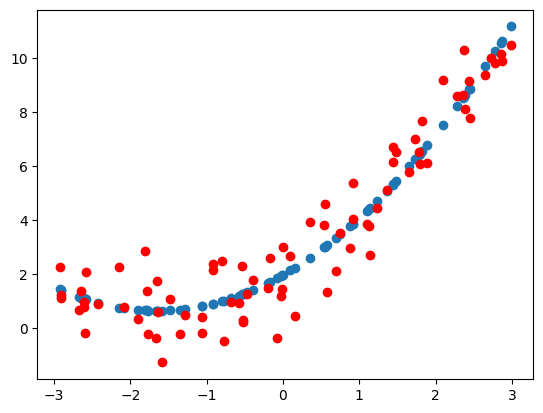

In [19]:
plt.scatter(X_train, regression_2.predict(X_train_poly))
plt.scatter(X_train, y_train, color='r')
plt.show()

In [20]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

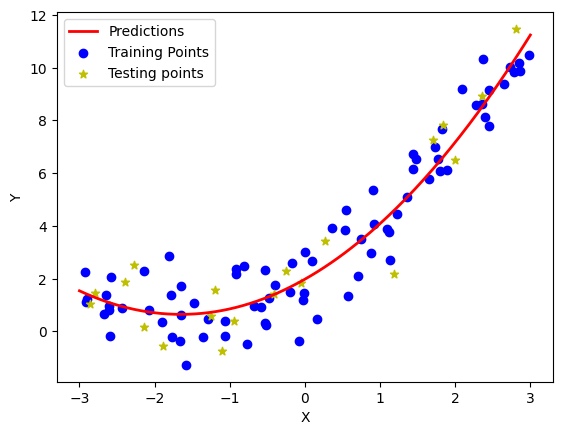

In [42]:
y_new = regression_2.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.scatter(X_train, y_train, color='b', label='Training Points')
plt.scatter(X_test, y_test, color='y', marker='*',label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
def poly_regression(degree):

    X_new  = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, 'r', label = 'Degree '+str(degree), linewidth = 2)
    plt.scatter(X_train, y_train, color='b')
    plt.scatter(X_test, y_test, color='y')
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-4, 4, 0, 10])
    plt.show()

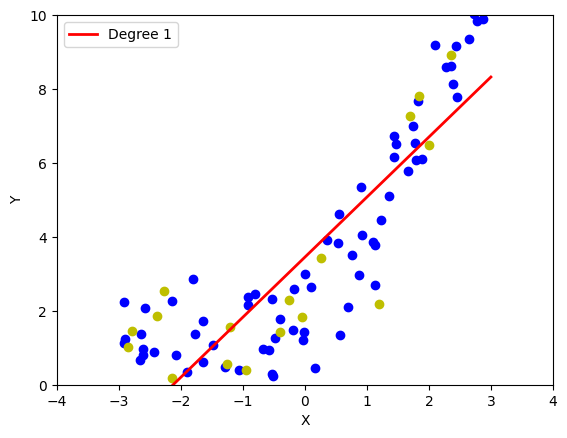

In [45]:
poly_regression(1)

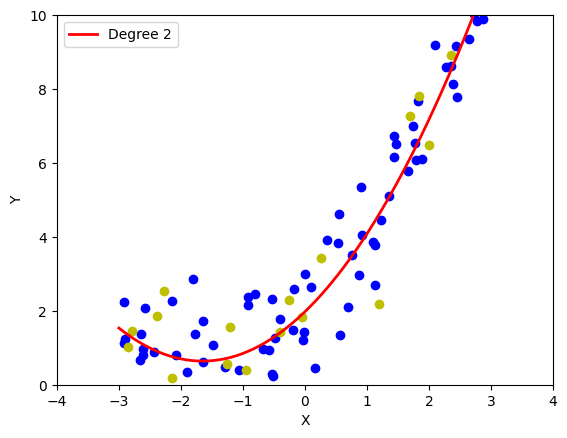

In [46]:
poly_regression(2)

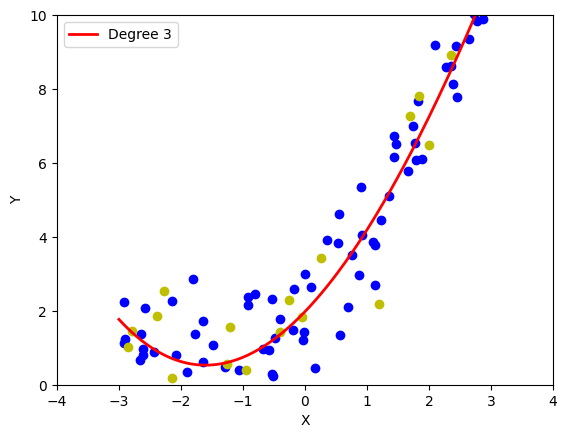

In [47]:
poly_regression(3)

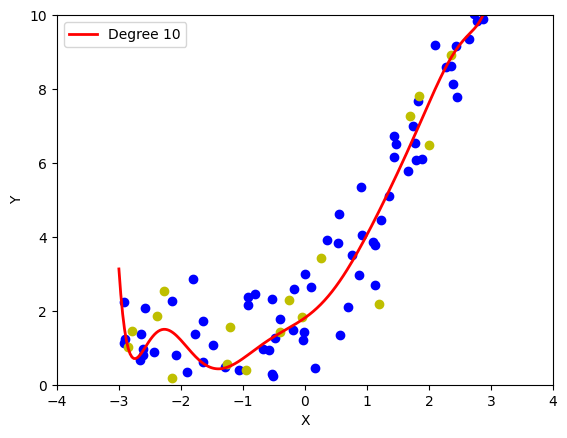

In [48]:
poly_regression(10)

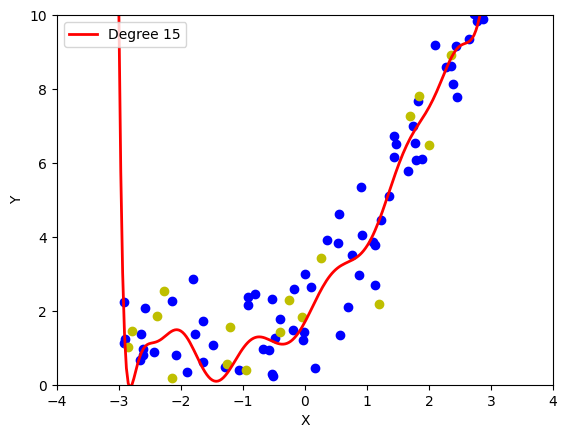

In [49]:
poly_regression(15)